In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/myanimelist-dataset-animes-profiles-reviews/animes.csv
/kaggle/input/myanimelist-dataset-animes-profiles-reviews/profiles.csv
/kaggle/input/myanimelist-dataset-animes-profiles-reviews/reviews.csv


In [2]:
df = pd.read_csv("/kaggle/input/myanimelist-dataset-animes-profiles-reviews/reviews.csv")
df.head()

,uid,profile,anime_uid,text,score,scores,link
0,255938,DesolatePsyche,34096,\n \n \n \n ...,8,"{'Overall': '8', 'Story': '8', 'Animation': '8...",https://myanimelist.net/reviews.php?id=255938
1,259117,baekbeans,34599,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=259117
2,253664,skrn,28891,\n \n \n \n ...,7,"{'Overall': '7', 'Story': '7', 'Animation': '9...",https://myanimelist.net/reviews.php?id=253664
3,8254,edgewalker00,2904,\n \n \n \n ...,9,"{'Overall': '9', 'Story': '9', 'Animation': '9...",https://myanimelist.net/reviews.php?id=8254
4,291149,aManOfCulture99,4181,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=291149


In [3]:
print(df['text'][10])


           
         
           
             
           
         
         
           more pics 
         
       
         
       
         
           Overall 
           8 
         
         
           Story 
           6 
         
                   
             Animation 
             7 
           
           
             Sound 
             7 
           
                 
           Character 
           6 
         
         
           Enjoyment 
           7 
         
       
     

                    
    This story was… well confusing. The problem was that they had a ‘puppeteer’ who was changing people’s thoughts and memories in order to use it for his own purpose to hack into official’s heads. I won’t lie, I don’t normally understand all that political stuff. The fact that this was so heavy in that made it more of a chore to try and figure stuff out. If I missed something that someone said, to bad, I couldn’t really go back and check it out because I wouldn’

In [4]:
df.drop(columns = ['uid', 'profile', 'scores', 'link'], inplace=True)
df.head()

,anime_uid,text,score
0,34096,\n \n \n \n ...,8
1,34599,\n \n \n \n ...,10
2,28891,\n \n \n \n ...,7
3,2904,\n \n \n \n ...,9
4,4181,\n \n \n \n ...,10


In [5]:
import re
import string

def clean_text(text):
    # Remove links (URLs)
    text_without_links = re.sub(r'https?\S+', '', text)

    # Remove leading and trailing whitespaces
    cleaned_text = text_without_links.strip()

    # Remove newlines and carriage returns
    cleaned_text = cleaned_text.replace('\n', '').replace('\r', '')

    # Remove punctuations
    cleaned_text = cleaned_text.translate(str.maketrans('', '', string.punctuation))

    # Convert text to lowercase
    cleaned_text = cleaned_text.lower()

    # Replace multiple whitespaces with a single space
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text)

    return cleaned_text

df['cleaned_text'] = df['text'].apply(clean_text)
df.head()

,anime_uid,text,score,cleaned_text
0,34096,\n \n \n \n ...,8,more pics overall 8 story 8 animation 8 sound ...
1,34599,\n \n \n \n ...,10,more pics overall 10 story 10 animation 10 sou...
2,28891,\n \n \n \n ...,7,more pics overall 7 story 7 animation 9 sound ...
3,2904,\n \n \n \n ...,9,more pics overall 9 story 9 animation 9 sound ...
4,4181,\n \n \n \n ...,10,more pics overall 10 story 10 animation 8 soun...


In [6]:
print(df['cleaned_text'][10])

more pics overall 8 story 6 animation 7 sound 7 character 6 enjoyment 7 this story was… well confusing the problem was that they had a ‘puppeteer’ who was changing people’s thoughts and memories in order to use it for his own purpose to hack into official’s heads i won’t lie i don’t normally understand all that political stuff the fact that this was so heavy in that made it more of a chore to try and figure stuff out if i missed something that someone said to bad i couldn’t really go back and check it out because i wouldn’t know where to find it again when we get to the characters the only ones we really get to understand slightly are batou and kusanagi the others just seem like background characters compared to them even then we don’t get much about the two although you can tell that batou really cares greatly for kusanagi when we do get near the end it does get into a rather interesting and deep it really dives into physiological problems and aspects to life it might of still been a 

In [7]:
# remove specified portion of the text
def remove_text(text):
    text_without_first_part = re.sub(r'^more.*?enjoyment\s+\d+', '', text)
    text_without_helpful = re.sub(r'\bhelpful\b', '', text_without_first_part).strip()
    return text_without_helpful

df['cleaned_text'] = df['cleaned_text'].apply(remove_text)

In [8]:
print(df['cleaned_text'][10])

this story was… well confusing the problem was that they had a ‘puppeteer’ who was changing people’s thoughts and memories in order to use it for his own purpose to hack into official’s heads i won’t lie i don’t normally understand all that political stuff the fact that this was so heavy in that made it more of a chore to try and figure stuff out if i missed something that someone said to bad i couldn’t really go back and check it out because i wouldn’t know where to find it again when we get to the characters the only ones we really get to understand slightly are batou and kusanagi the others just seem like background characters compared to them even then we don’t get much about the two although you can tell that batou really cares greatly for kusanagi when we do get near the end it does get into a rather interesting and deep it really dives into physiological problems and aspects to life it might of still been a rather confusing show but i did enjoy it the art style starts out with a

In [9]:
# sentiment labeling
def get_sentiment(score):
    return 'positive' if score >= 7 else 'negative'

df['sentiment'] = df['score'].apply(get_sentiment)
df.head(192112)

,anime_uid,text,score,cleaned_text,sentiment
0,34096,\n \n \n \n ...,8,first things first my reviews system is explai...,positive
1,34599,\n \n \n \n ...,10,let me start off by saying that made in abyss ...,positive
2,28891,\n \n \n \n ...,7,art 910 it is great especially the actions dur...,positive
3,2904,\n \n \n \n ...,9,story taking place 1 yr from where season 1 tr...,positive
4,4181,\n \n \n \n ...,10,kyoto animations greatest strength is being ab...,positive
...,...,...,...,...,...
192107,1281,\n \n \n \n ...,9,ok this anime is pretty old but heres the back...,positive
192108,1281,\n \n \n \n ...,9,the dub for this anime is made this anime a fu...,positive
192109,1281,\n \n \n \n ...,3,some might argue that doing a review of a show...,negative
192110,1281,\n \n \n \n ...,10,absolutely hilarious i accidentally came acros...,positive


In [10]:
# creating a new dataframe for average scores for each anime_uid.
average_scores = df.groupby('anime_uid')['score'].mean()
sort = average_scores.sort_values(ascending=False)
df_avg = pd.DataFrame(sort)
df_avg.reset_index(inplace=True)
df_avg.columns = ['anime_uid', 'average_score']
df_avg.shape

(8113, 2)

In [11]:
df_avg.head(8113)

,anime_uid,average_score
0,4574,10.0
1,31695,10.0
2,31756,10.0
3,6399,10.0
4,31797,10.0
...,...,...
8108,8925,1.0
8109,29975,1.0
8110,10466,1.0
8111,31585,1.0


In [12]:
# creating a new dataframe that contains the total number of reviewers for each anime_uid
anime_uids = df['anime_uid'].unique()
anime_reviewers = []

for uid in anime_uids:
    anime_reviewers.append(len(df[df['anime_uid'] == uid]))
    
set_of_anime_reviewer = {}

keys = anime_uids
values = anime_reviewers

for key, value in zip(keys, values):
    set_of_anime_reviewer[key] = value

data_reviewer = pd.DataFrame(keys, columns=['anime_uid'])
data_reviewer['reviewers_count'] = values
data_reviewer.shape

(8113, 2)

In [13]:
data_reviewer.head(8113)

,anime_uid,reviewers_count
0,34096,34
1,34599,610
2,28891,104
3,2904,520
4,4181,1194
...,...,...
8108,16934,4
8109,2514,2
8110,18753,4
8111,10033,14


In [14]:
# merging the dataframe containing average scores with the dataframe containing total reviewers.
merged_df = pd.merge(data_reviewer, df_avg, on='anime_uid')
merged_df = merged_df.sort_values(by='reviewers_count', ascending=False)
merged_df.reset_index(drop=True, inplace=True)
merged_df.shape

(8113, 3)

In [15]:
merged_df.head(8113)

,anime_uid,reviewers_count,average_score
0,1535,1708,8.809133
1,9253,1558,8.976893
2,32281,1436,8.662953
3,11757,1292,6.390093
4,5114,1274,9.243328
...,...,...,...
8108,4773,1,6.000000
8109,37954,1,10.000000
8110,39215,1,4.000000
8111,10832,1,6.000000


In [16]:
# finding the clean rating for each anime_uid
def calculate_rating_clean(df):
    df['rating_clean'] = (df['average_score'] * df['reviewers_count']) / 1708
    return df

final_clean_df = calculate_rating_clean(merged_df)
final_clean_df = final_clean_df.sort_values(by='rating_clean', ascending=False)

print(final_clean_df.shape)

(8113, 4)


In [17]:
final_clean_df.head(8113)

,anime_uid,reviewers_count,average_score,rating_clean
0,1535,1708,8.809133,8.809133
1,9253,1558,8.976893,8.188525
2,32281,1436,8.662953,7.283372
4,5114,1274,9.243328,6.894614
5,4181,1194,9.195980,6.428571
...,...,...,...,...
7184,28951,1,1.000000,0.000585
7477,12295,1,1.000000,0.000585
7480,22415,1,1.000000,0.000585
7486,5476,1,1.000000,0.000585


In [18]:
df.head()

,anime_uid,text,score,cleaned_text,sentiment
0,34096,\n \n \n \n ...,8,first things first my reviews system is explai...,positive
1,34599,\n \n \n \n ...,10,let me start off by saying that made in abyss ...,positive
2,28891,\n \n \n \n ...,7,art 910 it is great especially the actions dur...,positive
3,2904,\n \n \n \n ...,9,story taking place 1 yr from where season 1 tr...,positive
4,4181,\n \n \n \n ...,10,kyoto animations greatest strength is being ab...,positive


In [19]:
df.drop(columns = ['text', 'score'], inplace=True)

In [20]:
# creating the final dataframe
final_df = pd.merge(final_clean_df, df, on='anime_uid')
final_df = final_df.sort_values(by='reviewers_count', ascending=False)
final_df.reset_index(drop=True, inplace=True)
final_df.shape

(192112, 6)

In [21]:
final_df.head(192112)

,anime_uid,reviewers_count,average_score,rating_clean,cleaned_text,sentiment
0,1535,1708,8.809133,8.809133,this is a unique show that brings a new meanin...,positive
1,1535,1708,8.809133,8.809133,i loved death note one of the best animes it i...,positive
2,1535,1708,8.809133,8.809133,note that this is my first review so it may no...,positive
3,1535,1708,8.809133,8.809133,when i was a child i wanted to watch death not...,positive
4,1535,1708,8.809133,8.809133,translated by app from chinese forum 1apples a...,positive
...,...,...,...,...,...,...
192107,15279,1,7.000000,0.004098,ok so let me start off this is not an anime it...,positive
192108,4792,1,7.000000,0.004098,time to look at one of the many shorts that co...,positive
192109,5826,1,7.000000,0.004098,a cartoony silly baseball battle with bunnies ...,positive
192110,30039,1,7.000000,0.004098,story the plot is about finding the demon lord...,positive


In [22]:
final_df.drop(columns = ['average_score'], inplace=True)

In [23]:
final_df.head(192112)

,anime_uid,reviewers_count,rating_clean,cleaned_text,sentiment
0,1535,1708,8.809133,this is a unique show that brings a new meanin...,positive
1,1535,1708,8.809133,i loved death note one of the best animes it i...,positive
2,1535,1708,8.809133,note that this is my first review so it may no...,positive
3,1535,1708,8.809133,when i was a child i wanted to watch death not...,positive
4,1535,1708,8.809133,translated by app from chinese forum 1apples a...,positive
...,...,...,...,...,...
192107,15279,1,0.004098,ok so let me start off this is not an anime it...,positive
192108,4792,1,0.004098,time to look at one of the many shorts that co...,positive
192109,5826,1,0.004098,a cartoony silly baseball battle with bunnies ...,positive
192110,30039,1,0.004098,story the plot is about finding the demon lord...,positive


In [24]:
final_df["sentiment"].value_counts()

positive    142343
negative     49769
Name: sentiment, dtype: int64

# Merging to Check The Top 20 Positive Anime and The Top 20 Negative Anime

In [25]:
final_top_mdf = final_df.groupby(['anime_uid', 'reviewers_count', 'rating_clean', 'sentiment']).agg({
    'cleaned_text': list,   # Merge cleaned_text as a list
}).reset_index()

In [26]:
final_top_mdf = final_top_mdf.sort_values(by='reviewers_count', ascending=False)
final_top_mdf.reset_index(drop=True, inplace=True)
final_top_mdf.head(8113)

,anime_uid,reviewers_count,rating_clean,sentiment,cleaned_text
0,1535,1708,8.809133,negative,[baktığımız zaman konu orijinal iyi işlenebile...
1,1535,1708,8.809133,positive,[this is a unique show that brings a new meani...
2,9253,1558,8.188525,positive,[so steinsgate is this guy that changes the pa...
3,9253,1558,8.188525,negative,[id been recommended steinsgate by a friend so...
4,32281,1436,7.283372,negative,[i got to say i generally dont rate visually s...
...,...,...,...,...,...
8108,429,4,0.018735,positive,[this short little fiftyminute ova is wow kale...
8109,9006,4,0.017564,positive,[rei zero is an anime original prequel to the ...
8110,9008,4,0.021077,positive,[ok since this is my first review let me go ov...
8111,1512,4,0.016393,positive,[we have one of the best if not the best expon...


In [27]:
pos_mdf = final_top_mdf[final_top_mdf['sentiment'] == 'positive']
sortedpos_mdf = pos_mdf.sort_values(by=['reviewers_count', 'rating_clean'], ascending=[False, False])
top20pos_mdf = sortedpos_mdf.head(20)
top20pos_mdf.reset_index(drop=True, inplace=True)
top20pos_mdf.head(20)

,anime_uid,reviewers_count,rating_clean,sentiment,cleaned_text
0,1535,1708,8.809133,positive,[this is a unique show that brings a new meani...
1,9253,1558,8.188525,positive,[so steinsgate is this guy that changes the pa...
2,32281,1436,7.283372,positive,[having not seen any of makoto shinkais films ...
3,11757,1292,4.833724,positive,[minor spoilers sao has a bad reputation and f...
4,5114,1274,6.894614,positive,[fullmetal alchemist brotherhood is an anime t...
5,4181,1194,6.428571,positive,[definitely the most touching thing i have eve...
6,4224,1140,5.763466,positive,[this anime was one of the best animes what i ...
7,9756,1130,5.751756,positive,[english review translated version first of al...
8,10620,1082,4.809133,positive,[never have i wanted to side with protagonists...
9,2001,978,5.044496,positive,[though fairly straightforward and bearing man...


In [28]:
neg_mdf = final_top_mdf[final_top_mdf['sentiment'] == 'negative']
sortedneg_mdf = neg_mdf.sort_values(by=['rating_clean', 'reviewers_count'], ascending=[True, False])
top20neg_mdf = sortedneg_mdf.head(20)
top20neg_mdf.reset_index(drop=True, inplace=True)
top20neg_mdf.head(20)

,anime_uid,reviewers_count,rating_clean,sentiment,cleaned_text
0,8925,1,0.000585,negative,[kobe to watashi is pretty terrible in every r...
1,7721,1,0.000585,negative,[often ill find a series and dislike it but th...
2,8353,1,0.000585,negative,[alright since no one reviewed on thisumwonder...
3,7882,1,0.000585,negative,[well this was not very entertaining at all le...
4,7617,1,0.000585,negative,[tucked into an inconveniently located corner ...
5,8705,1,0.000585,negative,[stay away there seem to be a lot of people lo...
6,5193,1,0.000585,negative,[this anime scares me shinjuku shin chan is th...
7,38712,1,0.000585,negative,[i dont write reviews but since this doesnt ha...
8,5476,1,0.000585,negative,[you might recall some time around 2014 when t...
9,39826,1,0.000585,negative,[this ed is worse than the show its featured i...


# Unmerging The Top 20 Positive Anime and The Top 20 Negative Anime Dataframe

In [29]:
top20pos_udf = top20pos_mdf.explode('cleaned_text')
top20pos_udf.reset_index(inplace=True, drop=True)
top20pos_udf.shape

(17858, 5)

In [30]:
top20pos_udf.head(17858)

,anime_uid,reviewers_count,rating_clean,sentiment,cleaned_text
0,1535,1708,8.809133,positive,this is a unique show that brings a new meanin...
1,1535,1708,8.809133,positive,i loved death note one of the best animes it i...
2,1535,1708,8.809133,positive,note that this is my first review so it may no...
3,1535,1708,8.809133,positive,when i was a child i wanted to watch death not...
4,1535,1708,8.809133,positive,translated by app from chinese forum 1apples a...
...,...,...,...,...,...
17853,19815,778,3.512881,positive,i started this anime because i was bored and i...
17854,19815,778,3.512881,positive,this is one of those animes that you dont foun...
17855,19815,778,3.512881,positive,whether were up against elves or god blank nev...
17856,19815,778,3.512881,positive,story oh how i came across this anime was pret...


In [31]:
top20neg_udf = top20neg_mdf.explode('cleaned_text')
top20neg_udf.reset_index(inplace=True, drop=True)
top20neg_udf.shape

(20, 5)

In [32]:
top20neg_udf.head(20)

,anime_uid,reviewers_count,rating_clean,sentiment,cleaned_text
0,8925,1,0.000585,negative,kobe to watashi is pretty terrible in every re...
1,7721,1,0.000585,negative,often ill find a series and dislike it but thi...
2,8353,1,0.000585,negative,alright since no one reviewed on thisumwonderf...
3,7882,1,0.000585,negative,well this was not very entertaining at all let...
4,7617,1,0.000585,negative,tucked into an inconveniently located corner o...
5,8705,1,0.000585,negative,stay away there seem to be a lot of people loo...
6,5193,1,0.000585,negative,this anime scares me shinjuku shin chan is thr...
7,38712,1,0.000585,negative,i dont write reviews but since this doesnt hav...
8,5476,1,0.000585,negative,you might recall some time around 2014 when te...
9,39826,1,0.000585,negative,this ed is worse than the show its featured in...


# Tokenization and Lemmatization Using The Unmerged Dataframe

In [33]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load('en_core_web_sm')

def preprocess_text(text):
    allowed_postags = ['NOUN', 'ADJ', 'VERB', 'ADV']
    
    # Tokenization and Lemmatization using spaCy
    doc = nlp(text)
    lemmatized_words = [token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]

    # Removing stopwords using spaCy's built-in stop words
    filtered_words = [word for word in lemmatized_words if word.lower() not in STOP_WORDS]

    return filtered_words

top20pos_udf['tokenized_text'] = top20pos_udf['cleaned_text'].apply(preprocess_text)
top20neg_udf['tokenized_text'] = top20neg_udf['cleaned_text'].apply(preprocess_text)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [34]:
top20pos_udf.head(17858)

,anime_uid,reviewers_count,rating_clean,sentiment,cleaned_text,tokenized_text
0,1535,1708,8.809133,positive,this is a unique show that brings a new meanin...,"[unique, bring, new, meaning, concept, ldquode..."
1,1535,1708,8.809133,positive,i loved death note one of the best animes it i...,"[love, death, note, good, anime, basically, hi..."
2,1535,1708,8.809133,positive,note that this is my first review so it may no...,"[note, review, death, note, probably, popular,..."
3,1535,1708,8.809133,positive,when i was a child i wanted to watch death not...,"[child, want, watch, death, note, forget, free..."
4,1535,1708,8.809133,positive,translated by app from chinese forum 1apples a...,"[translate, app, note, apple, clue, link, luc,..."
...,...,...,...,...,...,...
17853,19815,778,3.512881,positive,i started this anime because i was bored and i...,"[start, anime, bored, think, good, decision, l..."
17854,19815,778,3.512881,positive,this is one of those animes that you dont foun...,"[anime, find, hundre, different, anime, series..."
17855,19815,778,3.512881,positive,whether were up against elves or god blank nev...,"[elf, lose, sora, truer, word, speak, game, li..."
17856,19815,778,3.512881,positive,story oh how i came across this anime was pret...,"[story, come, anime, prettywell, come, anime, ..."


In [35]:
top20neg_udf.head(20)

,anime_uid,reviewers_count,rating_clean,sentiment,cleaned_text,tokenized_text
0,8925,1,0.000585,negative,kobe to watashi is pretty terrible in every re...,"[kobe, watashi, pretty, terrible, respect, val..."
1,7721,1,0.000585,negative,often ill find a series and dislike it but thi...,"[ill, find, series, dislike, series, dislike, ..."
2,8353,1,0.000585,negative,alright since no one reviewed on thisumwonderf...,"[review, thisumwonderful, anime, like, time, p..."
3,7882,1,0.000585,negative,well this was not very entertaining at all let...,"[entertaining, let, start, realize, originally..."
4,7617,1,0.000585,negative,tucked into an inconveniently located corner o...,"[tuck, inconveniently, locate, corner, shibuya..."
5,8705,1,0.000585,negative,stay away there seem to be a lot of people loo...,"[stay, away, lot, people, look, trust, miss, f..."
6,5193,1,0.000585,negative,this anime scares me shinjuku shin chan is thr...,"[anime, scare, visual, communication, frame, h..."
7,38712,1,0.000585,negative,i dont write reviews but since this doesnt hav...,"[write, review, log, day, timbre, short, minut..."
8,5476,1,0.000585,negative,you might recall some time around 2014 when te...,"[recall, time, daughter, find, stash, sexy, mo..."
9,39826,1,0.000585,negative,this ed is worse than the show its featured in...,"[ed, bad, feature, s, huge, feat, music, fine,..."


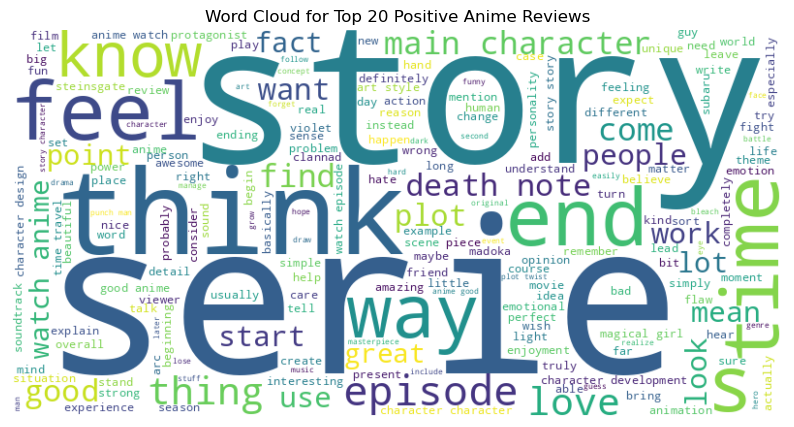

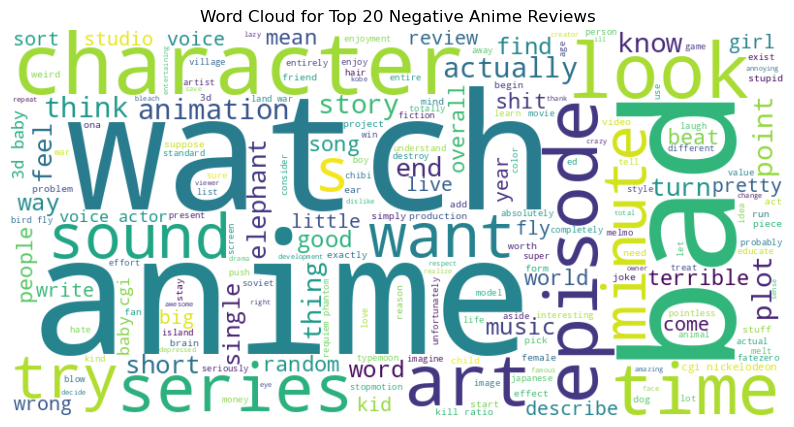

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

pos_tokenized_texts = top20pos_udf['tokenized_text'].explode()
neg_tokenized_texts = top20neg_udf['tokenized_text'].explode()

# Create a WordCloud instance for positive texts
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(' '.join(pos_tokenized_texts))

# Create a WordCloud instance for negative texts
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(' '.join(neg_tokenized_texts))

# Plotting the positive word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Top 20 Positive Anime Reviews')
plt.show()

# Plotting the negative word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Top 20 Negative Anime Reviews')
plt.show()

# LDA (Gensim)

In [53]:
import gensim
import gensim.corpora as corpora
from gensim.models import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim
import numpy as np
import tqdm
import random

In [54]:
data_words = top20pos_udf["tokenized_text"]
id2word = corpora.Dictionary(data_words)
corpus = [id2word.doc2bow(text) for text in data_words]

In [55]:
def compute_coherence_values(corpus, dictionary, k, a, b):
    lda_model = LdaMulticore(corpus=corpus,
                             id2word=dictionary,
                             num_topics=k,
                             random_state=100,
                             chunksize=100,
                             passes=10,
                             alpha=a,
                             eta=b)

    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
    return coherence_model_lda.get_coherence()

num_randomizations = 20  # Number of random combinations to try

grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 10
max_topics = 30
step_size = 5
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Validation sets
num_of_docs = len(corpus)
corpus_sets = [gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), corpus]
corpus_title = ['75% Corpus', '100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

if 1 == 1:
    pbar = tqdm.tqdm(total=(num_randomizations))

    for _ in range(num_randomizations):
        i = random.choice(range(len(corpus_sets)))  # Randomly select a corpus set index
        
        # Randomly choose parameters for this iteration
        k = random.choice(topics_range)
        a = random.choice(alpha)
        b = random.choice(beta)
        
        # Get the coherence score for the given parameters
        cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, k=k, a=a, b=b)
        
        # Save the model results
        model_results['Validation_Set'].append(corpus_title[i])
        model_results['Topics'].append(k)
        model_results['Alpha'].append(a)
        model_results['Beta'].append(b)
        model_results['Coherence'].append(cv)

        pbar.update(1)
            
    pbar.close()

100%|██████████| 20/20 [1:48:30<00:00, 325.54s/it]


In [109]:
lda_df = pd.DataFrame(model_results)
lda_df.shape

(20, 5)

In [110]:
lda_df.head(20)

,Validation_Set,Topics,Alpha,Beta,Coherence
0,100% Corpus,25,asymmetric,0.91,0.564082
1,100% Corpus,20,symmetric,symmetric,0.404464
2,100% Corpus,20,0.31,0.91,0.448697
3,75% Corpus,25,asymmetric,0.31,0.577910
4,100% Corpus,10,0.31,0.01,0.346325
5,75% Corpus,25,0.01,symmetric,0.432537
6,75% Corpus,20,0.61,symmetric,0.370741
7,75% Corpus,20,symmetric,0.61,0.593546
8,75% Corpus,20,0.01,0.31,0.547911
9,100% Corpus,20,asymmetric,0.31,0.452037


In [111]:
# finding the best hyperparameters from the DataFrame
best_idx = lda_df['Coherence'].idxmax()
best_coherence = lda_df['Coherence'][best_idx]
best_validation_set = lda_df['Validation_Set'][best_idx]
best_topics = lda_df['Topics'][best_idx]
best_alpha = lda_df['Alpha'][best_idx]
best_beta = lda_df['Beta'][best_idx]

In [112]:
print(f"Best Validation Set: {best_validation_set}")
print(f"Best Topics: {best_topics}")
print(f"Best Alpha: {best_alpha}")
print(f"Best Beta: {best_beta}")
print(f"Best Coherence Score: {best_coherence}")

Best Validation Set: 75% Corpus
Best Topics: 20
Best Alpha: symmetric
Best Beta: 0.61
Best Coherence Score: 0.5935455913685788


In [113]:
validation_set_index = corpus_title.index('75% Corpus')
corpus_75 = corpus_sets[validation_set_index]

In [114]:
num_topics = 20
lda_model = gensim.models.LdaMulticore(corpus=corpus_75,
                                       id2word=id2word,
                                       num_topics=num_topics, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       alpha='symmetric',
                                       eta=0.61)

In [115]:
lda_display = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
pyLDAvis.display(lda_display)

/opt/conda/lib/python3.10/site-packages/pyLDAvis/_prepare.py:248: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_max